# import necessary libraries

In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv("C:/Users/Thamizhiniyan/Downloads/college_1.csv")

In [3]:
df2 = pd.read_csv("C:/Users/Thamizhiniyan/Downloads/college_2.csv")

In [4]:
df1.head(3)

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               84 non-null     object 
 1   python             84 non-null     float64
 2   mysql              84 non-null     float64
 3   Previous Geekions  84 non-null     int64  
 4   CodeKata Score     84 non-null     int64  
 5   Department         84 non-null     object 
 6   Rising             84 non-null     int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 4.7+ KB


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Name                    35 non-null     object
 1   python                  35 non-null     int64 
 2   python_en               35 non-null     int64 
 3   mysql                   35 non-null     int64 
 4   computational_thinking  35 non-null     int64 
 5   Previous Geekions       35 non-null     int64 
 6   CodeKata Score          35 non-null     int64 
 7   Department              35 non-null     object
 8   Rising                  35 non-null     int64 
dtypes: int64(7), object(2)
memory usage: 2.6+ KB


In [7]:
print("df1 and df2",df1.shape,df2.shape)

df1 and df2 (84, 7) (35, 9)


In [8]:
df2.head(3)

,Name,python,python_en,mysql,computational_thinking,Previous Geekions,CodeKata Score,Department,Rising
0,ASHOK KUMAR K,100,0,31,9,19400,19400,Electronics and Electrical Engineering,0
1,Chandru,0,20,0,0,14150,14490,Computer Science and Engineering,340
2,Ganesh Ramkumar R,-1,55,24,6,8790,10790,Computer Science and Engineering,2000


In [9]:
df1.count()

Name                 84
python               84
mysql                84
Previous Geekions    84
CodeKata Score       84
Department           84
Rising               84
dtype: int64

In [10]:
df2.count()

Name                      35
python                    35
python_en                 35
mysql                     35
computational_thinking    35
Previous Geekions         35
CodeKata Score            35
Department                35
Rising                    35
dtype: int64

# merging those two csv files (after getting as dataframes, get them as a single dataframe)

In [11]:
#merged_csv = pd.merge(df1,df2,on =["Name","python","mysql","Previous Geekions","CodeKata Score","Department","Rising"],how="outer")
#OR
merged_csv = pd.concat([df1,df2],axis=0,ignore_index = True)

In [12]:
merged_csv.iloc[84,:]

Name                                               ASHOK KUMAR K
python                                                     100.0
mysql                                                       31.0
Previous Geekions                                          19400
CodeKata Score                                             19400
Department                Electronics and Electrical Engineering
Rising                                                         0
python_en                                                    0.0
computational_thinking                                       9.0
Name: 84, dtype: object

In [13]:
merged_csv.isnull().sum()

Name                       0
python                     0
mysql                      0
Previous Geekions          0
CodeKata Score             0
Department                 0
Rising                     0
python_en                 84
computational_thinking    84
dtype: int64

In [14]:
merged_csv.shape

(119, 9)

In [15]:
merged_csv.count()

Name                      119
python                    119
mysql                     119
Previous Geekions         119
CodeKata Score            119
Department                119
Rising                    119
python_en                  35
computational_thinking     35
dtype: int64

In [16]:
merged_csv.head(3)

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN


In [17]:
merged_csv.dtypes

Name                       object
python                    float64
mysql                     float64
Previous Geekions           int64
CodeKata Score              int64
Department                 object
Rising                      int64
python_en                 float64
computational_thinking    float64
dtype: object

In [18]:
merged_csv= merged_csv.astype({"python":int,"mysql":int})

In [19]:
merged_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    119 non-null    object 
 1   python                  119 non-null    int32  
 2   mysql                   119 non-null    int32  
 3   Previous Geekions       119 non-null    int64  
 4   CodeKata Score          119 non-null    int64  
 5   Department              119 non-null    object 
 6   Rising                  119 non-null    int64  
 7   python_en               35 non-null     float64
 8   computational_thinking  35 non-null     float64
dtypes: float64(2), int32(2), int64(3), object(2)
memory usage: 7.6+ KB


##Take each csv file , split that csv file into multiple categories (example csv files are added in the repo)
* consider if the codekata score exceeds 15000 points(present week) then make a csv on those observations as Exceeded expectations.csv
* if 10000<codekata score<15000 (Reached_expectations.csv)
* if 7000<codekata score<10000 (Needs_Improvement.csv)

In [20]:
Exceeded_expectations = merged_csv.loc[(merged_csv["CodeKata Score"]>=15000)]

In [21]:
import os    

In [22]:
os.makedirs('D:/DS/task_data_processing', exist_ok=True)  
Exceeded_expectations.to_csv('D:/DS/task_data_processing/Exceeded_expectations_.csv')

In [23]:
Reached_expectations = merged_csv.loc[(merged_csv["CodeKata Score"]>=10000) & (merged_csv["CodeKata Score"]<15000)]

In [24]:
Reached_expectations 

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
3,Mugunthan S,100,47,10610,10610,Computer Science and Engineering,0,NaN,NaN
85,Chandru,0,0,14150,14490,Computer Science and Engineering,340,20.0,0.0
86,Ganesh Ramkumar R,-1,24,8790,10790,Computer Science and Engineering,2000,55.0,6.0
87,Bodipudi Harini,-1,35,10040,10040,Electronics and Communication Engineering,0,0.0,-1.0


In [25]:
os.makedirs('D:/DS/task_data_processing', exist_ok=True)  
Reached_expectations.to_csv('D:/DS/task_data_processing/Reached_expectations_.csv')

In [26]:
Needs_Improvement = merged_csv.loc[(merged_csv["CodeKata Score"]>=7000) & (merged_csv["CodeKata Score"]<10000)]

In [27]:
Needs_Improvement

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
4,Sathammai.S,100,8,8980,8980,Computer Science and Engineering,0,NaN,NaN
5,NIVEESHWAR S,100,0,8200,8200,Computer Science and Engineering,0,NaN,NaN
6,KALAIARASAN K,85,47,7750,7880,Electronics and Communication Engineering,130,NaN,NaN
7,MOHAMED ZUBAIR AHMED,82,4,7020,7020,Computer Science and Engineering,0,NaN,NaN
88,VIINU V P,-1,24,9150,9150,Electronics and Electrical Engineering,0,100.0,-1.0
89,Poojitha Y,0,35,7210,8970,Computer Science and Engineering,1760,78.0,0.0
90,Gowtham Chandrasekaran,-1,0,7250,8950,Computer Science and Engineering,1700,0.0,3.0
91,Gowtham R,-1,4,8650,8650,Electronics and Communication Engineering,0,60.0,6.0
92,shifak N,58,0,5180,8320,Electronics and Electrical Engineering,3140,0.0,0.0
93,Balaji,-1,20,6170,8160,Electronics and Electrical Engineering,1990,100.0,0.0


In [28]:
os.makedirs('D:/DS/task_data_processing', exist_ok=True)  
Needs_Improvement.to_csv('D:/DS/task_data_processing/Needs_Improvement_.csv')

* if codekate score < 7000 (Unsatisfactory.csv)

In [29]:
Unsatisfactory = merged_csv.loc[(merged_csv["CodeKata Score"]<70000)]

In [30]:
os.makedirs('D:/DS/task_data_processing', exist_ok=True)  
Unsatisfactory.to_csv('D:/DS/task_data_processing/Unsatisfactory_.csv')

In [31]:
Unsatisfactory

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82,20,24500,24500,Computer Science and Engineering,0,NaN,NaN
1,V.JEEVITHA,82,20,21740,21740,Computer Science and Engineering,0,NaN,NaN
2,HEMAVATHI.R,100,100,19680,19680,Computer Science and Engineering,0,NaN,NaN
3,Mugunthan S,100,47,10610,10610,Computer Science and Engineering,0,NaN,NaN
4,Sathammai.S,100,8,8980,8980,Computer Science and Engineering,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
114,praveen raj j,24,0,2380,2380,Computer Science and Engineering,0,-1.0,0.0
115,AMARNATH D,-1,12,1890,1890,Electronics and Communication Engineering,0,52.0,-1.0
116,bala,32,0,1720,1720,Electronics and Communication Engineering,0,49.0,-1.0
117,XY Z,-1,-1,0,0,Computer Science and Engineering,0,20.0,-1.0


# Average of previous week geekions vs this week geekions (i.e Previous Geekions vs CodeKata Score)

In [32]:
print("Previous Geekions:",merged_csv["Previous Geekions"].mean())
print("CodeKata Score :" ,merged_csv["CodeKata Score"].mean())


Previous Geekions: 3842.3529411764707
CodeKata Score : 4051.764705882353


In [33]:
merged_csv.mean()

C:\Users\Thamizhiniyan\AppData\Local\Temp\ipykernel_16048\2030752910.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_csv.mean()


python                      54.344538
mysql                       23.478992
Previous Geekions         3842.352941
CodeKata Score            4051.764706
Rising                     209.411765
python_en                   29.657143
computational_thinking       2.200000
dtype: float64

# No of students participated 

In [34]:
print("no.of.participants: ",merged_csv["Name"].count())

no.of.participants:  119


In [35]:
merged_csv.count()

Name                      119
python                    119
mysql                     119
Previous Geekions         119
CodeKata Score            119
Department                119
Rising                    119
python_en                  35
computational_thinking     35
dtype: int64

# Average completion of python course or my_sql or python english or computational thinking

# rising star of the week (top 3 candidate who performed well in that particular week)

In [36]:
merged_csv["Rising"].sort_values(ascending = False).head(3)

92     3140
102    2000
86     2000
Name: Rising, dtype: int64

In [37]:
merged_csv.sort_values(by="Rising",ascending = False).head(3)

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
92,shifak N,58,0,5180,8320,Electronics and Electrical Engineering,3140,0.0,0.0
102,Narasimhan Y L,-1,0,4800,6800,Computer Science and Engineering,2000,-1.0,0.0
86,Ganesh Ramkumar R,-1,24,8790,10790,Computer Science and Engineering,2000,55.0,6.0


# Shining stars of the week (top 3 candidates who has highest geekions)

In [38]:
merged_csv.sort_values(by="CodeKata Score",ascending = False).head(3)

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82,20,24500,24500,Computer Science and Engineering,0,NaN,NaN
1,V.JEEVITHA,82,20,21740,21740,Computer Science and Engineering,0,NaN,NaN
2,HEMAVATHI.R,100,100,19680,19680,Computer Science and Engineering,0,NaN,NaN


# Department wise codekata performence (pie chart)

In [39]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [40]:
merged_csv.Department.value_counts()

Computer Science and Engineering             63
Electronics and Communication Engineering    39
Electronics and Electrical Engineering       17
Name: Department, dtype: int64

In [41]:
dep = merged_csv["CodeKata Score"].groupby([merged_csv["Department"]]).sum()

In [42]:
total_score = dep.sum()

In [43]:
# dep[0]
# dep[1]
# dep[2]

In [44]:
dep.index =["CSE","ECE","EEE"]

In [45]:
pd.DataFrame({"total":[dep[0],dep[1],dep[2]]},index=dep.index)

,total
CSE,320025
ECE,108335
EEE,53800


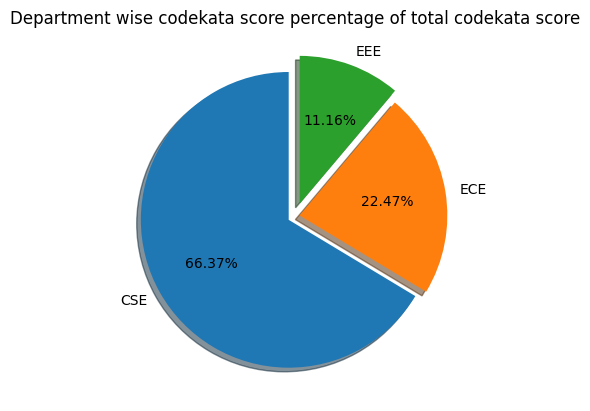

In [46]:
def score():
    plt.pie([dep[0]/total_score,dep[1]/total_score,dep[2]/total_score],
        startangle = 90 ,
        shadow     = True,
        explode    = (0.05,0.03,0.09),
        labels     = ("CSE","ECE","EEE"),
        autopct    = "%.2f%%")
    plt.title("Department wise codekata score percentage of total codekata score")
score()

# Department wise toppers (horizantal bar graph or any visual representations of your choice)

In [47]:
toppers = merged_csv.groupby("Department")

In [48]:
toppers_table = toppers.apply(lambda x : x.max())
toppers_table.index =["CSE","ECE","EEE"]

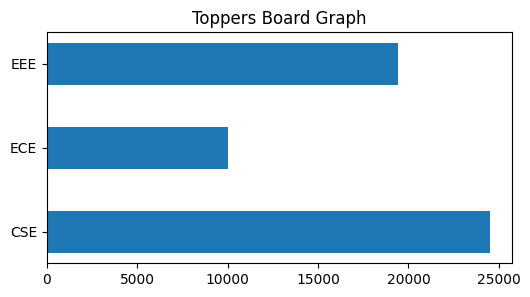

In [49]:
def topper_garph():
    plt.figure(figsize=(6, 3))
    plt.barh(width = toppers_table["CodeKata Score"],y = toppers_table.index,height=0.5)
    plt.title("Toppers Board Graph")
topper_garph()